C:\Users\Anisha\AppData\Local\Temp\ipykernel_15252\2231787547.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


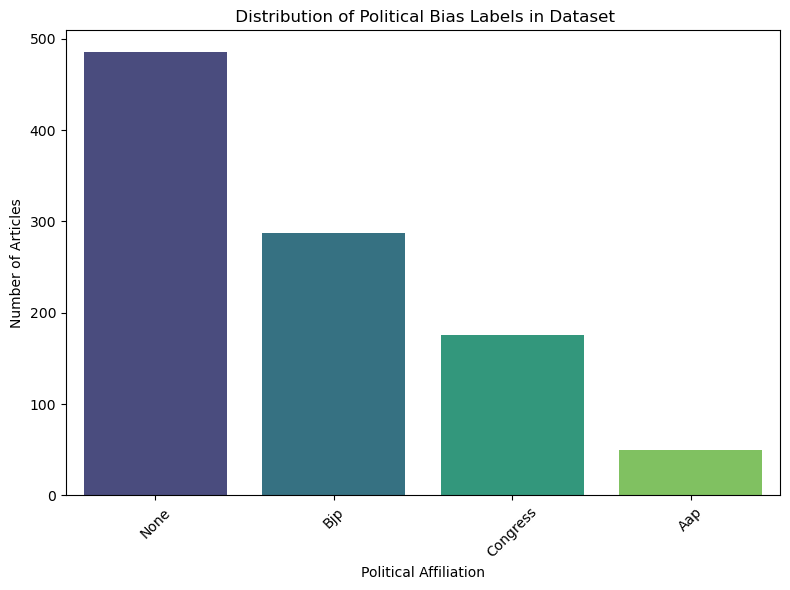

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv('./data/Final_Data_Article_Annotation.csv', encoding='latin1')
df.rename(columns={df.columns[0]: 'text', df.columns[1]: 'label'}, inplace=True)

# Convert to string and clean
df['label'] = df['label'].astype(str).str.strip().str.title()

# Explicitly fix common issues with 'None' values
df['label'] = df['label'].replace({'Nan': 'None', '': 'None', 'None': 'None'})

# Count and plot
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title(" Distribution of Political Bias Labels in Dataset")
plt.xlabel("Political Affiliation")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Anisha\AppData\Local\Temp\ipykernel_15252\3410478576.py:14: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  plt.tight_layout()
C:\Users\Anisha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


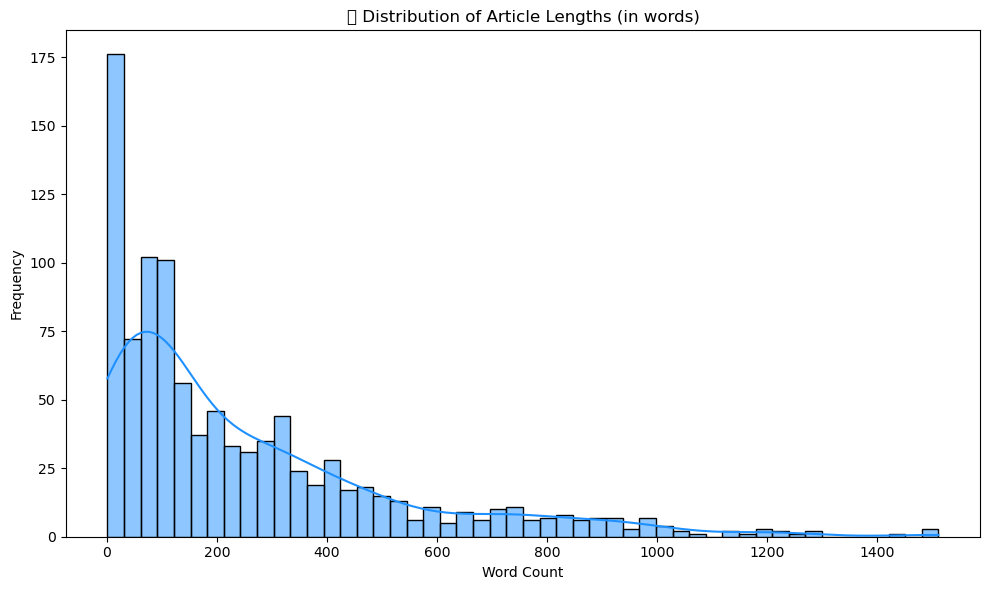

In [33]:
# Convert to string and safely compute text length
df['text'] = df['text'].astype(str)
df['text_length'] = df['text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Plot the distribution of article lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='dodgerblue')
plt.title("📏 Distribution of Article Lengths (in words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 217.9 kB/s eta 0:00:02
   ---------------------------------------  297.0/301.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.6 MB/s eta 0:00:00


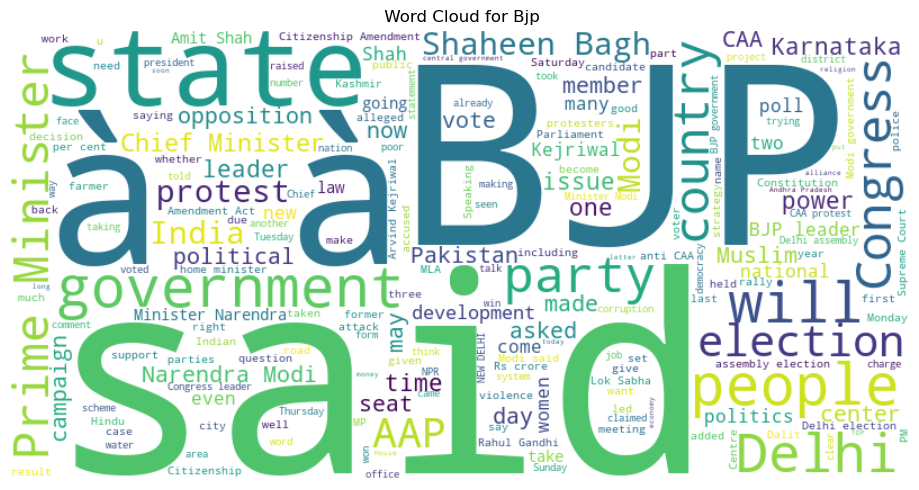

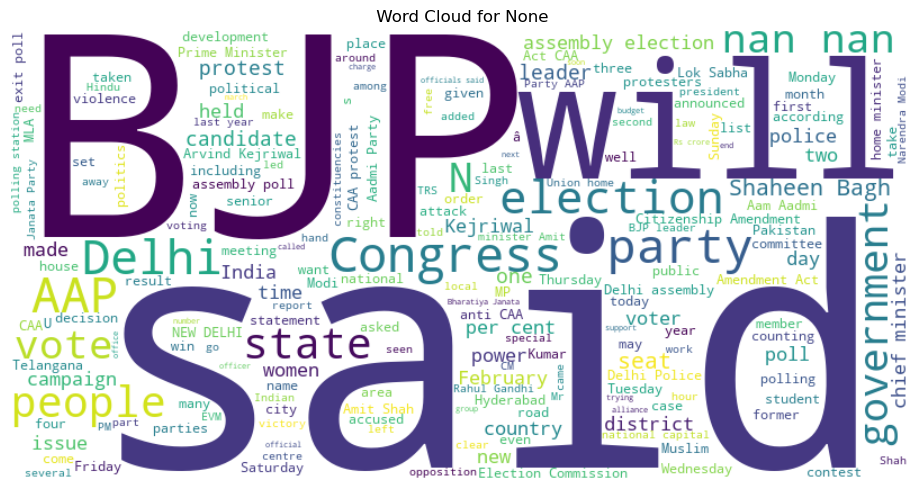

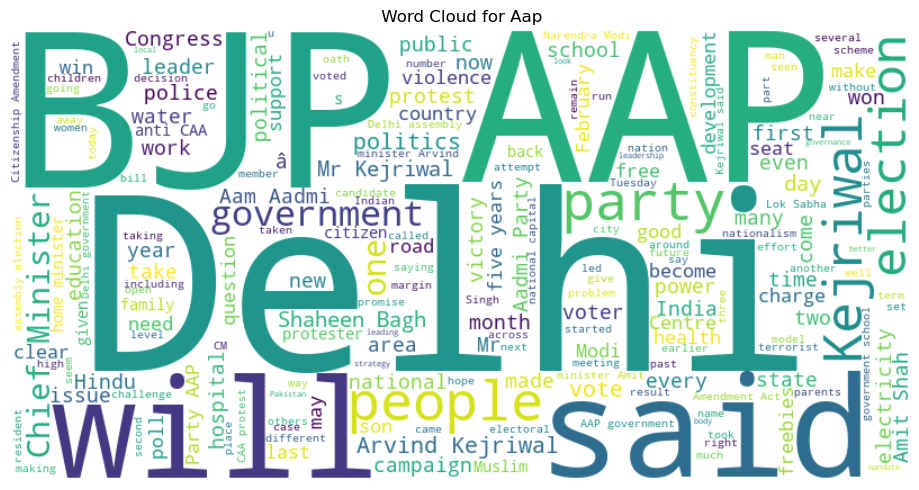

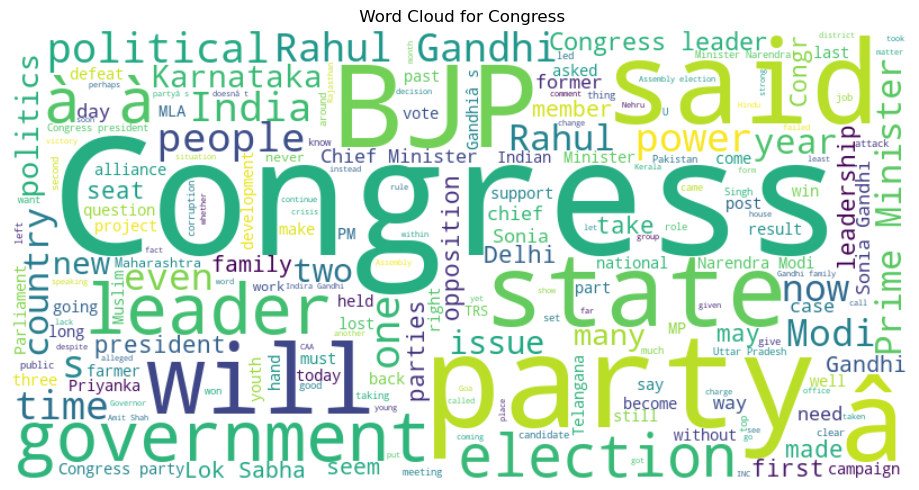

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

labels = df['label'].unique()

for label in labels:
    # Combine all text for the current label
    text_data = df[df['label'] == label]['text'].astype(str)
    combined_text = " ".join(text_data)

    if combined_text.strip():  # Only proceed if there is non-empty text
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f" Word Cloud for {label}")
        plt.axis("off")
        plt.tight_layout()
        plt.show()
    else:
        print(f" Skipping label '{label}' — no text found.")


C:\Users\Anisha\AppData\Local\Temp\ipykernel_15252\680672640.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


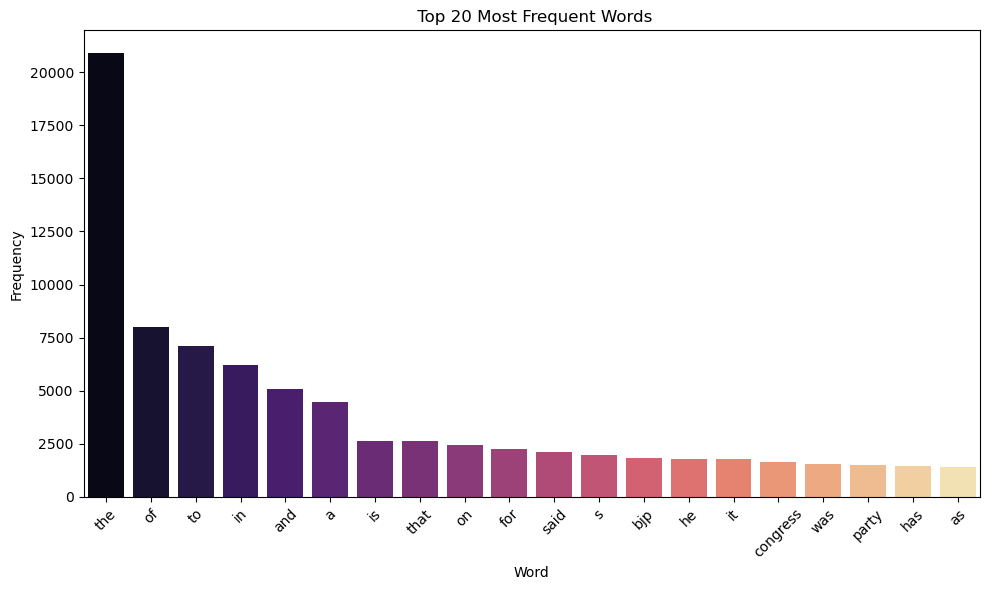

In [37]:
from collections import Counter
import re

# Simple tokenizer and frequency count
all_words = " ".join(df['text'].astype(str).tolist())
all_words = re.findall(r'\b\w+\b', all_words.lower())
word_freq = Counter(all_words)

# Plot top 20
most_common = word_freq.most_common(20)
words, counts = zip(*most_common)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.xticks(rotation=45)
plt.title(" Top 20 Most Frequent Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


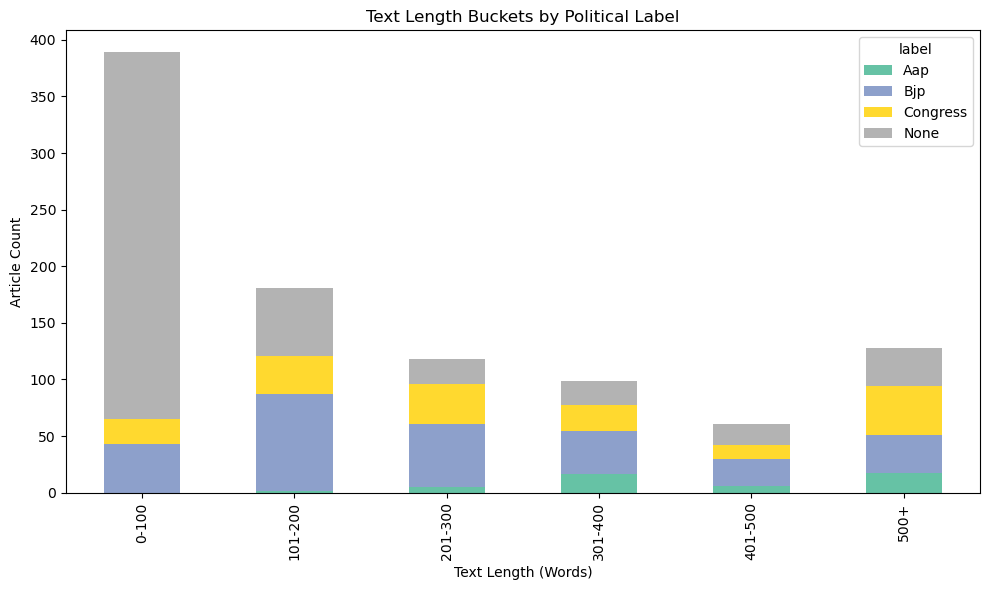

In [39]:
# Bucket the text length
df['length_bucket'] = pd.cut(df['text_length'], bins=[0, 100, 200, 300, 400, 500, 1000], labels=['0-100','101-200','201-300','301-400','401-500','500+'])

# Cross-tab
length_vs_label = pd.crosstab(df['length_bucket'], df['label'])

# Plot
length_vs_label.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Text Length Buckets by Political Label")
plt.xlabel("Text Length (Words)")
plt.ylabel("Article Count")
plt.tight_layout()
plt.show()


In [41]:
print(df['label'].unique())


['Bjp' 'None' 'Aap' 'Congress']
